<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    یادگیری ماشین <br>
<font color=2565AE size=5>
    دانشکده مهندسی کامپیوتر <br>
    پاییز ۱۴۰۳ <br>
<font color=3C99D size=5>
   تمرین عملی اول - یادگیری نظارت شده <br>
<font color=696880 size=4>
    عرفان سلیما - سارینا حشمتی - نیکان واسعی - فاطمه شیری

<div dir=rtl>
<font size=6>
اطلاعات دانشجو

In [46]:
student_number = '401105901'
Name = 'Amirardalan'
Last_Name = 'Dehghanpour' 

<div dir=rtl>
<font size=6>
نحوه پیاده سازی

<div dir=rtl>
<font size=4>
 با استفاده از تابع make_blobs از کتابخانه sklearn به کمک قطعه کد
زیر، مجموعه داده ای بسازید که به صورت خطی
جدایی پذیر باشد. هر ستون از ماتریس X شامل ویژگی های یک نمونه داده است.

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, Y = make_blobs(n_samples=100, n_features=10, centers=2, random_state=41)

<div dir=rtl>
<font size=4>
 ابتدا کلاسی به نام F در نظر بگیرید و یکی از متد های آن را به نام sign پیاده سازی کنید. متدهای این کلاس متعلق به کلاس
هستند و باید به صورت static تعریف شوند. در حقیقت این کلاس مسئول نگهداری توابع کاربردی برای انجام محاسبات
است که در اینجا ما فقط میخواهیم sign را تعریف کنیم.

In [48]:
class F:
  @staticmethod
  def sign(x):
    # Implement the sign activation function
    if(x>+0):
      return 1
    else:
      return 0
    pass

<div dir=rtl>
<font size=4>
 کلاس Perceptron را مانند تکه کد زیر در نظر بگیرید. این موجودیت تنها وظیفه نگهداری وزن های پرسپترون ما و محاسبه
y براساس ورودی ما یعنی X را دارد. برای مقدار دهی اولیه وزن ها و بایاس میتوانید از کتابخانه numpy استفاده کنید.

In [50]:
import numpy as np
class Perceptron:
  def __init__(self, input_size):
    # Initialize the weights and biases of the new model
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

  def forward(self, input):
    # Feed input features to your model and return output
        linear_output = np.dot(self.weights, input) + self.bias
        return F.sign(linear_output)

<div dir=rtl>
<font size=4>
حال کلاس Optimizer را مطابق قطعه کد زیر پیاده سازی کنید. این کلاس وظیفه این را دارد که مدل ما را بهینه کند. بدین
معنی که در هر مرحله از یادگیری سعی کند وزن ها را در جهتی بروزرسانی کند که در نهایت ما هیچ خطایی نداشته باشیم (با
فرض خطی جدایی پذیر بودن داده ها)

In [51]:
class Optimizer:
  def __init__(self, model):
    self.model=model
    self.learning_rate=0.01
    pass
  def update(self, x, y, y_hat):
    self.model.weights += self.learning_rate * (y-y_hat)*x
    # Update weight and bias of the model
    pass

<div dir=rtl>
<font size=4>
با توجه به تعداد ویژگی های داده های موجود، یک شی Perceptron بسازید (این پارامتر باید با تعداد ویژگی های قسمت
اول یکسان باشد) در مرحله بعدی به Optimizer اجازه دهید تا به مدل شما دسترسی داشته باشد تا بتواند آن را بهینه کند.

<div dir=rtl>
<font size=4>
در این قسمت شما باید با پیاده سازی فرآیندی مناسب با استفاده از instance های Optimizer و Perceptron وضعیت
مدل را بهبود بدهید تا به ابر صفحه جدا کننده نزدیک تر شود.

In [52]:
X_2, Y_2 = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)
perceptron=Perceptron(2)
optimizer=Optimizer(perceptron)
n_iter = 1000
for _ in range(n_iter):
  for x, y in zip(X_2, Y_2):
    y_predict=perceptron.forward(x)
    optimizer.update(x,y,y_predict)
print(perceptron.weights)
    # Complete Code

[ 0.79462084 -0.12029785]


<div dir=rtl>
<font size=4>
به ازای n_features برابر ۲ نقاط مجموعه داده ی خود و خط حاصل از Perceptron خود را به کمک کتابخانه Ⅿatpⅼotⅼib
در فضای ۲ بعدی نمایش دهید.

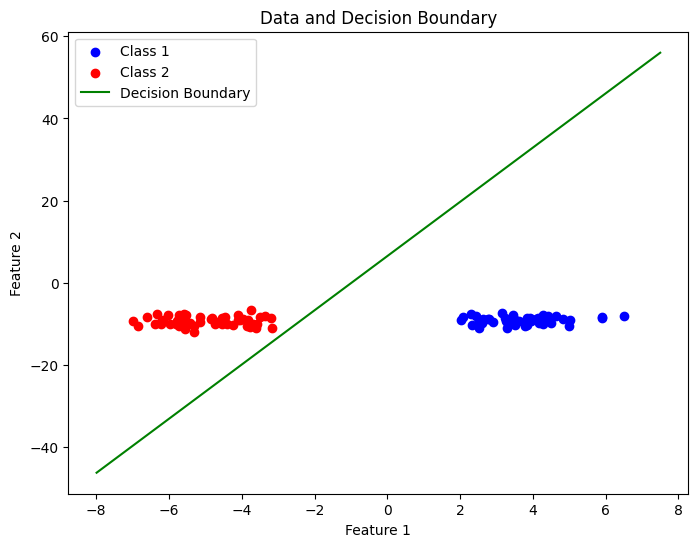

In [53]:
class_1=[]
class_2=[]
for i in range(X.shape[0]):
    if perceptron.forward(X_2[i])==1:
        class_1.append(X_2[i])
    else:
        class_2.append(X_2[i])
class_1_first, class_1_second = zip(*class_1)
class_2_first, class_2_second = zip(*class_2)
weights = perceptron.weights
bias = perceptron.bias
x_vals = np.linspace(np.min(X_2[:, 0]) - 1, np.max(X_2[:, 0]) + 1, 100)
y_vals = -(weights[0] * x_vals + bias) / weights[1]
plt.figure(figsize=(8, 6))
plt.scatter(class_1_first, class_1_second, label='Class 1', color='blue')
plt.scatter(class_2_first, class_2_second, label='Class 2', color='red')
plt.plot(x_vals, y_vals, label='Decision Boundary', color='green')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data and Decision Boundary')
plt.legend()
plt.show()